In [9]:
import gzip
f = gzip.open('train-images-idx3-ubyte.gz','r')

image_size = 28
num_images = 5

import numpy as np
f.read(16)
buf = f.read(image_size * image_size * num_images)
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
data = data.reshape(num_images, image_size, image_size, 1)

print(data.shape)

(5, 28, 28, 1)


In [14]:
import gzip
f = gzip.open('t10k-images-idx3-ubyte.gz','r')

image_size = 28
num_images = 5

import numpy as np
f.read(16)
buf = f.read(image_size * image_size * num_images)
data_test = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
data_test = data_test.reshape(num_images, image_size, image_size, 1)

print(data_test.shape)

(5, 28, 28, 1)


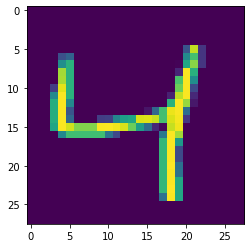

In [5]:
import matplotlib.pyplot as plt
image = np.asarray(data[2]).squeeze()
plt.imshow(image)
plt.show()

In [16]:
f = gzip.open('train-labels-idx1-ubyte.gz','r')
f.read(8)
for i in range(0,50):
    buf = f.read(1)
    labels = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
print(labels.shape)

(1,)


In [17]:
f = gzip.open('t10k-labels-idx1-ubyte.gz','r')
f.read(8)
for i in range(0,50):
    buf = f.read(1)
    labels_test = np.frombuffer(buf, dtype=np.uint8).astype(np.int64)
print(labels_test.shape)

(1,)


In [7]:
#Immagini 28x28. L'input layer conterrà 784 neuroni
#Il secondo layer (hidden layer) conterrà n neuroni
#L'output layer conterrà 10 neuroni, il neurone con "valore di attivazione" più alto indicherà quale è la cifra riconosciuta
#

In [11]:
#from keras.utils import to_categorical
#reshaping degli array contenenti i dati di training

train_X = data.reshape((num_images,28*28))
#train_y = to_categorical(labels)

In [13]:
# creazione della RN
from keras import models, layers

network = models.Sequential()
network.add(layers.Dense(784, activation="relu", input_shape = (28*28,)))
network.add(layers.Dense(500, activation="relu"))
network.add(layers.Dense(250, activation="relu"))
network.add(layers.Dense(90, activation="relu"))
network.add(layers.Dense(10, activation="softmax"))


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
#addestramento della RN con iperparametri per il tuning
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
network.fit(train_X,train_y, epochs=5, batch_size=150, validation_split=0.1)
